COMPARATIVA DEL Nº DE DETECCIONES POR MUESTRA
====

El objetivo de este script es compara el nº de detecciones en general, desglosando por punto de muestreo y, por último, por punto de muestreo y por tipo fino. Al igual que antes, primero me centro en hacer una comparativa a nivel general y, ya después, si nos interesara, comparativa a nivel de familia y/o de ARG individual

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings("ignore") #es una pesadez si no

import matplotlib
from matplotlib_venn import venn2, venn2_circles, venn3, venn3_circles

In [2]:
amp_data = pd.read_csv("../data/resistome_data/clean_data/ab_data_simple.csv", index_col = 0)

rep_info = {}
total_arg = len(amp_data.loc[amp_data["or_seq"] == "arg"]["Assay"].unique())
total_mge = len(amp_data.loc[amp_data["or_seq"] == "mge"]["Assay"].unique())
rep_info["arg"] = total_arg
rep_info["mge"] = total_mge

general_reps_df = pd.DataFrame.from_dict(rep_info, orient = "index", columns = ["total_reps"])

amp_data = amp_data[["Assay", "antib", "place","or_seq", "type_g", "rel_ab"]]

rep_info = {} 

for target in amp_data["or_seq"].unique():
    seq_data = amp_data[(amp_data["or_seq"] == target)]
    control_seqs = set(seq_data.loc[(seq_data["type_g"] == "control")]["Assay"])
    plastic_seqs = set(seq_data.loc[(seq_data["type_g"] == "plastic")]["Assay"])
    control_reps = len(control_seqs - plastic_seqs)
    plastic_reps = len(plastic_seqs - control_seqs)
    both_reps = len(plastic_seqs & control_seqs)
    rep_info[target] = (control_reps, plastic_reps, both_reps)

general_reps = pd.DataFrame.from_dict(rep_info, orient = "index", columns = ["control_reps", "plastic_reps", "both_reps"])

del rep_info
del plastic_reps
del control_reps
del seq_data
del target

general_reps_df = pd.concat([general_reps_df, general_reps], axis = 1)


#general_reps_arg["total_reps"] = 312.0
#general_reps_arg = general_reps_arg.iloc[1:5]
#general_reps_arg = general_reps_arg.drop(axis = 0, labels = np.nan)
#general_reps_arg
general_reps_df

,total_reps,control_reps,plastic_reps,both_reps
arg,310,2,81,199
mge,70,0,17,47


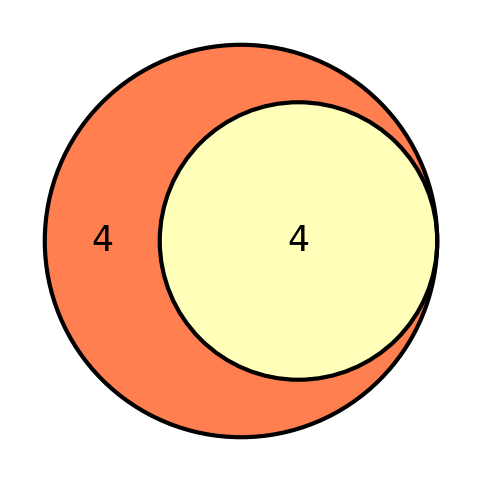

In [3]:
fig, ax = plt.subplots(figsize = (7,6))

left = -0.5

#subsets = ((general_reps_df.loc["mge"]["plastic_reps"]), 
#           (general_reps.loc["mge"]["control_reps"]),
#           (general_reps.loc["mge"]["both_reps"]))
subset_dict = {"10": 4, "01": 0, "11": 4}

v = venn2(subsets = subset_dict,
          set_labels=("", ""), 
          set_colors=("Coral", "Lightgreen"), alpha=1)
          #set_colors=("Gold", "Blue"), alpha=0.7)

v.get_patch_by_id('11').set_alpha(1)
v.get_patch_by_id("11").set_alpha(0.7)
v.get_label_by_id("11").set_size(25)
v.get_label_by_id("10").set_size(25)
v.get_label_by_id("01").set_size(0)

c = venn2_circles(subsets = subset_dict, alpha=1, linewidth = 3)
#c.get_line_by_id('10').set_linewidth(0.8)

#top = ax.get_ylim()[1] * 1.2
#txt = ax.text(left, top, s = "Greenhouse", verticalalignment='top', size = 15)
#txt.set_bbox(dict(facecolor='k', alpha=0.1))

In [4]:
#amp_data = pd.read_csv("../data/resistome_data/clean_data/ab_data_simple.csv", index_col = 0)

rep_info = {}
#total_arg = len(amp_data.loc[amp_data["or_seq"] == "arg"]["Assay"].unique())
#rep_info["arg"] = total_arg

general_reps_df = pd.DataFrame.from_dict(rep_info, orient = "index", columns = ["total_reps"])
amp_data = amp_data[["Assay", "antib", "place","or_seq", "type_g", "rel_ab"]]
amp_arg_data = amp_data[(amp_data["or_seq"] == "arg")]#.groupby(["place", "type_g"])
rep_info = {} 
for location in amp_arg_data["place"].unique():
    seq_data = amp_arg_data[(amp_arg_data["place"] == location)]
    control_seqs = set(seq_data.loc[(seq_data["type_g"] == "control")]["Assay"])
    plastic_seqs = set(seq_data.loc[(seq_data["type_g"] == "plastic")]["Assay"])
    control_reps = len(control_seqs - plastic_seqs)
    plastic_reps = len(plastic_seqs - control_seqs)
    both_reps = len(plastic_seqs & control_seqs)
    rep_info[location] = (control_reps, plastic_reps, both_reps)

general_reps = pd.DataFrame.from_dict(rep_info, orient = "index", columns = ["control_reps", "plastic_reps", "both_reps"])

del rep_info
del plastic_reps
del control_reps
del seq_data
del location

general_reps_arg = pd.concat([general_reps_df, general_reps], axis = 1)
del general_reps_df

general_reps_arg["total_reps"] = 310.0
#general_reps_arg = general_reps_arg.iloc[1:5]
general_reps_arg = general_reps_arg.drop(axis = 0, labels = np.nan)
general_reps_arg

,total_reps,control_reps,plastic_reps,both_reps
ardley,310.0,2,88,192
ion,310.0,1,26,7
uru,310.0,3,24,10


In [5]:
rep_info = {}
total_mge = len(amp_data.loc[amp_data["or_seq"] == "mge"]["Assay"].unique())
rep_info["mge"] = total_mge
general_reps_df = pd.DataFrame.from_dict(rep_info, orient = "index", columns = ["total_reps"])
amp_data = amp_data[["Assay", "antib", "place","or_seq", "type_g", "rel_ab"]]
amp_mge_data = amp_data[(amp_data["or_seq"] == "mge")]#.groupby(["place", "type_g"])
rep_info = {} 
for location in amp_mge_data["place"].unique():
    seq_data = amp_mge_data[(amp_mge_data["place"] == location)]
    control_seqs = set(seq_data.loc[(seq_data["type_g"] == "control")]["Assay"])
    plastic_seqs = set(seq_data.loc[(seq_data["type_g"] == "plastic")]["Assay"])
    
    control_reps = len(control_seqs - plastic_seqs)
    plastic_reps = len(plastic_seqs - control_seqs)
    both_reps = len(plastic_seqs & control_seqs)
    rep_info[location] = (control_reps, plastic_reps, both_reps)

general_reps = pd.DataFrame.from_dict(rep_info, orient = "index", columns = ["control_reps", "plastic_reps", "both_reps"])

del rep_info
del plastic_reps
del control_reps
del seq_data
del location

general_reps_mge = pd.concat([general_reps_df, general_reps], axis = 1)
del general_reps_df

general_reps_mge["total_reps"] = 70.0
general_reps_mge = general_reps_mge.iloc[1:4]
#general_reps_mge = general_reps_arg.drop(axis = 0, labels = np.nan)
general_reps_mge

,total_reps,control_reps,plastic_reps,both_reps
ardley,70.0,0.0,21.0,43.0
uru,70.0,1.0,3.0,5.0
ion,70.0,0.0,4.0,4.0


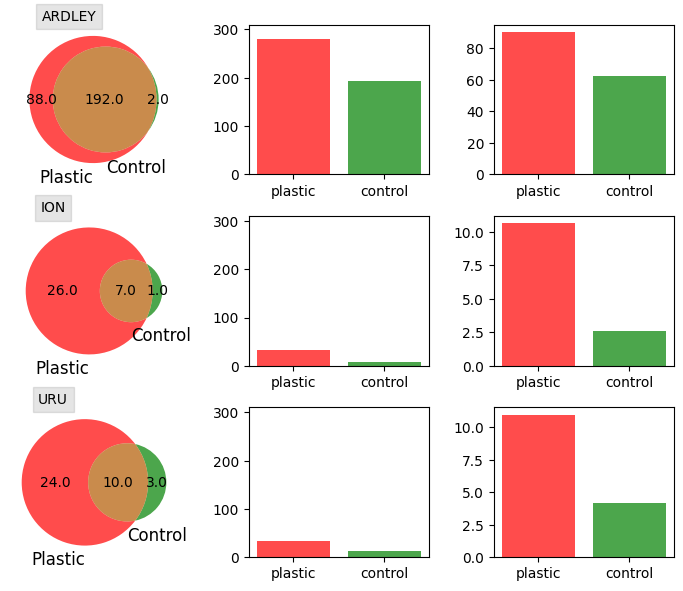

In [6]:
fig = plt.figure(figsize = (7,6))

left = -0.5
x_axis = ["plastic", "control"]
pos = 1
general_reps = general_reps_arg

for cat in list(general_reps.index):
    #diagrama de venn
    ax = fig.add_subplot(3, 3, pos)
    venn2(subsets= ((general_reps.loc[cat]["plastic_reps"]), 
                    (general_reps.loc[cat]["control_reps"]),
                    (general_reps.loc[cat]["both_reps"])),
          set_labels=("Plastic", "Control"), 
          set_colors=("red", "green"), alpha=0.7)
    top = ax.get_ylim()[1] * 1.2
    txt = ax.text(left, top, s = cat.upper(), verticalalignment='top')
    txt.set_bbox(dict(facecolor='k', alpha=0.1))
    
    pos += 1 #mueve en la figura una posición
    
    #barplot de total
    ax = fig.add_subplot(3, 3, pos)
    ax.bar(x = x_axis, 
           height = [(general_reps.loc[cat]["plastic_reps"] + general_reps.loc[cat]["both_reps"]), 
                     (general_reps.loc[cat]["control_reps"] + general_reps.loc[cat]["both_reps"])],
           color = ["red", "green"], alpha = 0.7
          )
    ax.set_ylim(top = general_reps.loc[cat]["total_reps"])
    
    pos += 1
    
    #barplot de %
    ax = fig.add_subplot(3, 3, pos)
    ax.bar(x = x_axis, 
           height = [(((general_reps.loc[cat]["plastic_reps"] + general_reps.loc[cat]["both_reps"])*100)/general_reps.loc[cat]["total_reps"]), 
                     (((general_reps.loc[cat]["control_reps"] + general_reps.loc[cat]["both_reps"]) * 100) / general_reps.loc[cat]["total_reps"])
                    ],
           color = ["red", "green"], alpha = 0.7
          )
    
    pos += 1

fig.tight_layout()
plt.show()

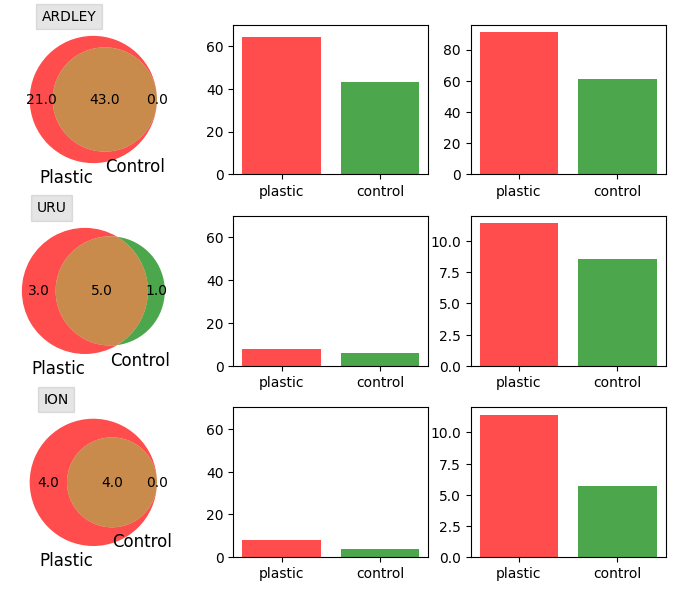

In [7]:
fig = plt.figure(figsize = (7,6))

left = -0.5
x_axis = ["plastic", "control"]
pos = 1
general_reps = general_reps_mge

for cat in list(general_reps.index):
    #diagrama de venn
    ax = fig.add_subplot(3, 3, pos)
    venn2(subsets= ((general_reps.loc[cat]["plastic_reps"]), 
                    (general_reps.loc[cat]["control_reps"]),
                    (general_reps.loc[cat]["both_reps"])),
          set_labels=("Plastic", "Control"), 
          set_colors=("red", "green"), alpha=0.7)
    top = ax.get_ylim()[1] * 1.2
    txt = ax.text(left, top, s = cat.upper(), verticalalignment='top')
    txt.set_bbox(dict(facecolor='k', alpha=0.1))
    
    pos += 1 #mueve en la figura una posición
    
    #barplot de total
    ax = fig.add_subplot(3, 3, pos)
    ax.bar(x = x_axis, 
           height = [(general_reps.loc[cat]["plastic_reps"] + general_reps.loc[cat]["both_reps"]), 
                     (general_reps.loc[cat]["control_reps"] + general_reps.loc[cat]["both_reps"])],
           color = ["red", "green"], alpha = 0.7
          )
    ax.set_ylim(top = general_reps.loc[cat]["total_reps"])
    
    pos += 1
    
    #barplot de %
    ax = fig.add_subplot(3, 3, pos)
    ax.bar(x = x_axis, 
           height = [(((general_reps.loc[cat]["plastic_reps"] + general_reps.loc[cat]["both_reps"])*100)/general_reps.loc[cat]["total_reps"]), 
                     (((general_reps.loc[cat]["control_reps"] + general_reps.loc[cat]["both_reps"]) * 100) / general_reps.loc[cat]["total_reps"])
                    ],
           color = ["red", "green"], alpha = 0.7
          )
    
    pos += 1

fig.tight_layout()
plt.show()

También, siendo fieles a lo que se ha representado para la comparación del nº de amplificaciones, debiera hacer la figura de la siguiente manera

In [8]:
amp_data = pd.read_csv("../data/resistome_data/clean_data/ab_data_simple.csv", index_col = 0)
amp_data.loc[(amp_data["place"] == "ion") | (amp_data["place"] == "uru"), "place"] = "lakes"
rep_info = {}
total_arg = len(amp_data.loc[amp_data["or_seq"] == "arg"]["Assay"].unique())
#total_mge = len(amp_data.loc[amp_data["or_seq"] == "mge"]["Assay"].unique())
rep_info["arg"] = total_arg
#rep_info["mge"] = total_mge
general_reps_df = pd.DataFrame.from_dict(rep_info, orient = "index", columns = ["total_reps"])
amp_data = amp_data[["Assay", "antib", "place","or_seq", "type_g", "rel_ab"]]
amp_arg_data = amp_data[(amp_data["or_seq"] == "arg")]#.groupby(["place", "type_g"])
rep_info = {} 
for location in amp_arg_data["place"].unique():
    seq_data = amp_arg_data[(amp_arg_data["place"] == location)]
    control_seqs = set(seq_data.loc[(seq_data["type_g"] == "control")]["Assay"])
    plastic_seqs = set(seq_data.loc[(seq_data["type_g"] == "plastic")]["Assay"])
    control_reps = len(control_seqs - plastic_seqs)
    plastic_reps = len(plastic_seqs - control_seqs)
    both_reps = len(plastic_seqs & control_seqs)
    rep_info[location] = (control_reps, plastic_reps, both_reps)

general_reps = pd.DataFrame.from_dict(rep_info, orient = "index", columns = ["control_reps", "plastic_reps", "both_reps"])

del rep_info
del plastic_reps
del control_reps
del seq_data
del location

general_reps_arg = pd.concat([general_reps_df, general_reps], axis = 1)
del general_reps_df

general_reps_arg["total_reps"] = 312.0
general_reps_arg = general_reps_arg.iloc[1:5]
general_reps_arg = general_reps_arg.drop(axis = 0, labels = np.nan)
general_reps_arg

,total_reps,control_reps,plastic_reps,both_reps
ardley,312.0,2.0,88.0,192.0
lakes,312.0,2.0,30.0,16.0


In [9]:
rep_info = {}
total_mge = len(amp_data.loc[amp_data["or_seq"] == "mge"]["Assay"].unique())
rep_info["mge"] = total_mge
general_reps_df = pd.DataFrame.from_dict(rep_info, orient = "index", columns = ["total_reps"])
amp_data = amp_data[["Assay", "antib", "place","or_seq", "type_g", "rel_ab"]]
amp_mge_data = amp_data[(amp_data["or_seq"] == "mge")]#.groupby(["place", "type_g"])
rep_info = {} 
for location in amp_mge_data["place"].unique():
    seq_data = amp_mge_data[(amp_mge_data["place"] == location)]
    control_seqs = set(seq_data.loc[(seq_data["type_g"] == "control")]["Assay"])
    plastic_seqs = set(seq_data.loc[(seq_data["type_g"] == "plastic")]["Assay"])
    
    control_reps = len(control_seqs - plastic_seqs)
    plastic_reps = len(plastic_seqs - control_seqs)
    both_reps = len(plastic_seqs & control_seqs)
    rep_info[location] = (control_reps, plastic_reps, both_reps)

general_reps = pd.DataFrame.from_dict(rep_info, orient = "index", columns = ["control_reps", "plastic_reps", "both_reps"])

del rep_info
del plastic_reps
del control_reps
del seq_data
del location

general_reps_mge = pd.concat([general_reps_df, general_reps], axis = 1)
del general_reps_df

general_reps_mge["total_reps"] = 70.0
general_reps_mge = general_reps_mge.iloc[1:3]
#general_reps_mge = general_reps_arg.drop(axis = 0, labels = np.nan)
general_reps_mge

,total_reps,control_reps,plastic_reps,both_reps
ardley,70.0,0.0,21.0,43.0
lakes,70.0,1.0,6.0,5.0


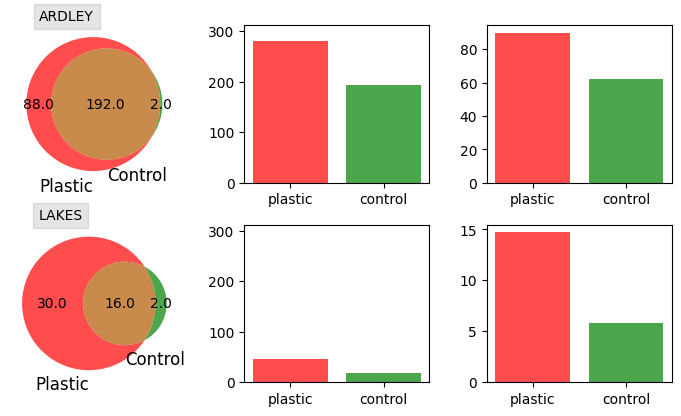

In [10]:
fig = plt.figure(figsize = (7,6))

left = -0.5
x_axis = ["plastic", "control"]
pos = 1
general_reps = general_reps_arg

for cat in list(general_reps.index):
    #diagrama de venn
    ax = fig.add_subplot(3, 3, pos)
    venn2(subsets= ((general_reps.loc[cat]["plastic_reps"]), 
                    (general_reps.loc[cat]["control_reps"]),
                    (general_reps.loc[cat]["both_reps"])),
          set_labels=("Plastic", "Control"), 
          set_colors=("red", "green"), alpha=0.7)
    top = ax.get_ylim()[1] * 1.2
    txt = ax.text(left, top, s = cat.upper(), verticalalignment='top')
    txt.set_bbox(dict(facecolor='k', alpha=0.1))
    
    pos += 1 #mueve en la figura una posición
    
    #barplot de total
    ax = fig.add_subplot(3, 3, pos)
    ax.bar(x = x_axis, 
           height = [(general_reps.loc[cat]["plastic_reps"] + general_reps.loc[cat]["both_reps"]), 
                     (general_reps.loc[cat]["control_reps"] + general_reps.loc[cat]["both_reps"])],
           color = ["red", "green"], alpha = 0.7
          )
    ax.set_ylim(top = general_reps.loc[cat]["total_reps"])
    
    pos += 1
    
    #barplot de %
    ax = fig.add_subplot(3, 3, pos)
    ax.bar(x = x_axis, 
           height = [(((general_reps.loc[cat]["plastic_reps"] + general_reps.loc[cat]["both_reps"])*100)/general_reps.loc[cat]["total_reps"]), 
                     (((general_reps.loc[cat]["control_reps"] + general_reps.loc[cat]["both_reps"]) * 100) / general_reps.loc[cat]["total_reps"])
                    ],
           color = ["red", "green"], alpha = 0.7
          )
    
    pos += 1

fig.tight_layout()
plt.show()

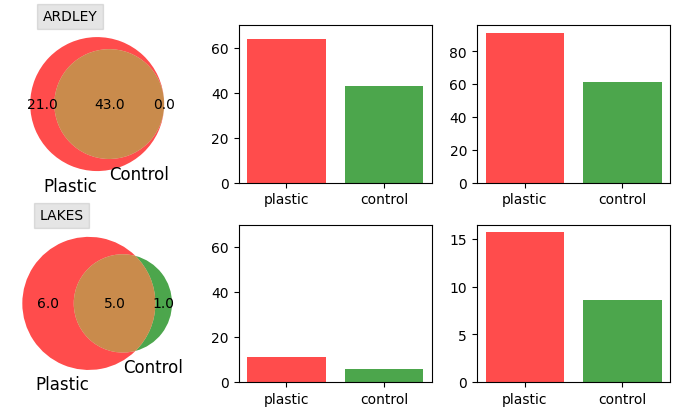

In [11]:
fig = plt.figure(figsize = (7,6))

left = -0.5
x_axis = ["plastic", "control"]
pos = 1
general_reps = general_reps_mge

for cat in list(general_reps.index):
    #diagrama de venn
    ax = fig.add_subplot(3, 3, pos)
    venn2(subsets= ((general_reps.loc[cat]["plastic_reps"]), 
                    (general_reps.loc[cat]["control_reps"]),
                    (general_reps.loc[cat]["both_reps"])),
          set_labels=("Plastic", "Control"), 
          set_colors=("red", "green"), alpha=0.7)
    top = ax.get_ylim()[1] * 1.2
    txt = ax.text(left, top, s = cat.upper(), verticalalignment='top')
    txt.set_bbox(dict(facecolor='k', alpha=0.1))
    
    pos += 1 #mueve en la figura una posición
    
    #barplot de total
    ax = fig.add_subplot(3, 3, pos)
    ax.bar(x = x_axis, 
           height = [(general_reps.loc[cat]["plastic_reps"] + general_reps.loc[cat]["both_reps"]), 
                     (general_reps.loc[cat]["control_reps"] + general_reps.loc[cat]["both_reps"])],
           color = ["red", "green"], alpha = 0.7
          )
    ax.set_ylim(top = general_reps.loc[cat]["total_reps"])
    
    pos += 1
    
    #barplot de %
    ax = fig.add_subplot(3, 3, pos)
    ax.bar(x = x_axis, 
           height = [(((general_reps.loc[cat]["plastic_reps"] + general_reps.loc[cat]["both_reps"])*100)/general_reps.loc[cat]["total_reps"]), 
                     (((general_reps.loc[cat]["control_reps"] + general_reps.loc[cat]["both_reps"]) * 100) / general_reps.loc[cat]["total_reps"])
                    ],
           color = ["red", "green"], alpha = 0.7
          )
    
    pos += 1

fig.tight_layout()
plt.show()

## Obtención del listado de genes

Llegados a este punto, aunque tenga los números (ojo que las visualizaciones distan de ser definitivas), me interesa generar el listado de genes exclusivos de cada punto para hacer tanto las tablas de suplementario como poder ver cómo de imbricados están las secuencias exclusivas con los genes altamente relacionados con MGEs.

In [12]:
amp_data = pd.read_csv("../data/resistome_data/clean_data/ab_data_simple.csv", index_col = 0)
amp_data = amp_data[["Assay", "antib", "place","or_seq", "type_f", "rel_ab"]]

arg_data = amp_data.loc[amp_data["or_seq"] == "arg"]
mge_data = amp_data.loc[amp_data["or_seq"] == "mge"]
del amp_data

PUR_seqs_a = set(arg_data.loc[arg_data["type_f"] == "PUR"]["Assay"])
EPS_seqs_a = set(arg_data.loc[arg_data["type_f"] == "EPS"]["Assay"])
soil_seqs_a = set(arg_data.loc[arg_data["type_f"] == "soil"]["Assay"])
water_seqs_a = set(arg_data.loc[arg_data["type_f"] == "water"]["Assay"])

PUR_seqs_m = set(mge_data.loc[mge_data["type_f"] == "PUR"]["Assay"])
EPS_seqs_m = set(mge_data.loc[mge_data["type_f"] == "EPS"]["Assay"])
soil_seqs_m = set(mge_data.loc[mge_data["type_f"] == "soil"]["Assay"])
water_seqs_m = set(mge_data.loc[mge_data["type_f"] == "water"]["Assay"])

water_seqs_a


{'aac3-Via', 'aadA7', 'copA', 'czcA', 'mphA', 'qepA_1_2', 'tetPA'}

Una vez tengo las secuencias que aparecen en cada punto, lo siguiente es ensamblar el puzle de quién aparece dónde y en qué combos.

In [13]:
# To facilitate keeping track: xx_xx, where initials before _ indicate presence AND intersect and after the _ indicate absence AND union 

# Completely exclusive to one tipology
p_esw = (((PUR_seqs_a - EPS_seqs_a) - soil_seqs_a) - water_seqs_a)
e_psw = (((EPS_seqs_a - PUR_seqs_a) - soil_seqs_a) - water_seqs_a)
s_pew = (((soil_seqs_a - PUR_seqs_a) - EPS_seqs_a) - water_seqs_a)
w_pes = (((water_seqs_a - PUR_seqs_a) - EPS_seqs_a) - soil_seqs_a)

# Present in two at the same time
pe_sw = (((PUR_seqs_a & EPS_seqs_a) - soil_seqs_a) - water_seqs_a)
ps_ew = (((PUR_seqs_a & soil_seqs_a) - EPS_seqs_a) - water_seqs_a)
pw_es = (((PUR_seqs_a & water_seqs_a) - EPS_seqs_a) - soil_seqs_a)

es_pw = (((EPS_seqs_a & soil_seqs_a) - PUR_seqs_a) - water_seqs_a)
ew_ps = (((EPS_seqs_a & water_seqs_a) - PUR_seqs_a) - soil_seqs_a)

sw_pe = (((soil_seqs_a & water_seqs_a) - PUR_seqs_a) - water_seqs_a)

# In three
pes_w = ((PUR_seqs_a & EPS_seqs_a & soil_seqs_a) - water_seqs_a)
pew_s = ((PUR_seqs_a & EPS_seqs_a & water_seqs_a) - soil_seqs_a)
psw_e = ((PUR_seqs_a & soil_seqs_a & water_seqs_a) - EPS_seqs_a)

esw_p = ((EPS_seqs_a & soil_seqs_a & water_seqs_a) - PUR_seqs_a)

# In all
pesw = PUR_seqs_a & EPS_seqs_a & soil_seqs_a & water_seqs_a

pesw

{'aac3-Via', 'aadA7', 'copA', 'czcA', 'mphA', 'qepA_1_2', 'tetPA'}

Y ahora necesito guardarme toda esta información de alguna manera. La más sencilla es, en mi opinión, en formato .json

In [15]:
all_info = {}

all_info["p_esw"] = list(p_esw)
all_info["e_psw"] = list(e_psw)
all_info["s_pew"] = list(s_pew)
all_info["w_pes"] = list(w_pes)
all_info["pe_sw"] = list(pe_sw)
all_info["ps_ew"] = list(ps_ew)
all_info["pw_es"] = list(pw_es)
all_info["es_pw"] = list(es_pw)
all_info["ew_ps"] = list(ew_ps)
all_info["sw_pe"] = list(sw_pe)
all_info["pes_w"] = list(pes_w)
all_info["pew_s"] = list(pew_s)
all_info["psw_e"] = list(psw_e)
all_info["esw_p"] = list(esw_p)
all_info["pesw"] = list(pesw)

Y ya puedo guardarlo

In [16]:
import json

with open("../data/resistome_data/metadata/arg_per_typology.json", "w") as fp:
    json.dump(all_info, fp)


In [17]:
# To facilitate keeping track: xx_xx, where initials before _ indicate presence AND intersect and after the _ indicate absence AND union 

## NOW MGES

# Completely exclusive to one tipology
p_esw = (((PUR_seqs_m - EPS_seqs_m) - soil_seqs_m) - water_seqs_m)
e_psw = (((EPS_seqs_m - PUR_seqs_m) - soil_seqs_m) - water_seqs_m)
s_pew = (((soil_seqs_m - PUR_seqs_m) - EPS_seqs_m) - water_seqs_m)
w_pes = (((water_seqs_m - PUR_seqs_m) - EPS_seqs_m) - soil_seqs_m)

# Present in two at the same time
pe_sw = (((PUR_seqs_m & EPS_seqs_m) - soil_seqs_m) - water_seqs_m)
ps_ew = (((PUR_seqs_m & soil_seqs_m) - EPS_seqs_m) - water_seqs_m)
pw_es = (((PUR_seqs_m & water_seqs_m) - EPS_seqs_m) - soil_seqs_m)

es_pw = (((EPS_seqs_m & soil_seqs_m) - PUR_seqs_m) - water_seqs_m)
ew_ps = (((EPS_seqs_m & water_seqs_m) - PUR_seqs_m) - soil_seqs_m)

sw_pe = (((soil_seqs_m & water_seqs_m) - PUR_seqs_m) - water_seqs_m)

# In three
pes_w = ((PUR_seqs_m & EPS_seqs_m & soil_seqs_m) - water_seqs_m)
pew_s = ((PUR_seqs_m & EPS_seqs_m & water_seqs_m) - soil_seqs_m)
psw_e = ((PUR_seqs_m & soil_seqs_m & water_seqs_m) - EPS_seqs_m)

esw_p = ((EPS_seqs_m & soil_seqs_m & water_seqs_m) - PUR_seqs_m)

# In all
pesw = PUR_seqs_m & EPS_seqs_m & soil_seqs_m & water_seqs_m

pesw

{'intI1F165_clinical', 'intl3', 'orf37-IS26', 'trb-C'}

In [18]:
all_info = {}

all_info["p_esw"] = list(p_esw)
all_info["e_psw"] = list(e_psw)
all_info["s_pew"] = list(s_pew)
all_info["w_pes"] = list(w_pes)
all_info["pe_sw"] = list(pe_sw)
all_info["ps_ew"] = list(ps_ew)
all_info["pw_es"] = list(pw_es)
all_info["es_pw"] = list(es_pw)
all_info["ew_ps"] = list(ew_ps)
all_info["sw_pe"] = list(sw_pe)
all_info["pes_w"] = list(pes_w)
all_info["pew_s"] = list(pew_s)
all_info["psw_e"] = list(psw_e)
all_info["esw_p"] = list(esw_p)
all_info["pesw"] = list(pesw)


with open("../data/resistome_data/metadata/mge_per_typology.json", "w") as fp:
    json.dump(all_info, fp)

In [20]:
amp_data = pd.read_csv("../data/resistome_data/clean_data/ab_data_simple.csv", index_col = 0)
ardley_data = amp_data.loc[amp_data["place"] == "ardley"]
del amp_data
ardley_data = ardley_data[["Assay", "antib", "type_f", "or_seq"]]
ardley_data_arg = ardley_data.loc[ardley_data["or_seq"] == "arg"]
ardley_data_mge = ardley_data.loc[ardley_data["or_seq"] == "mge"]

PUR_seqs = set(ardley_data_arg.loc[ardley_data_arg["type_f"] == "PUR"]["Assay"])
EPS_seqs = set(ardley_data_arg.loc[ardley_data_arg["type_f"] == "EPS"]["Assay"])
cont_seqs = set(ardley_data_arg.loc[ardley_data_arg["type_f"] == "soil"]["Assay"])

PUR_ex_a = len(PUR_seqs - (EPS_seqs | cont_seqs))
EPS_ex_a = len(EPS_seqs - (PUR_seqs | cont_seqs))
soil_ex_a = len(cont_seqs - (EPS_seqs | PUR_seqs))
pur_eps_sh_a = len((PUR_seqs & EPS_seqs) - cont_seqs)
pur_soil_sh_a = len((PUR_seqs & cont_seqs) - EPS_seqs)
eps_soil_sh_a = len((EPS_seqs & cont_seqs) - PUR_seqs)
all_sh_a = len(PUR_seqs & EPS_seqs & cont_seqs)

PUR_seqs = set(ardley_data_mge.loc[ardley_data_mge["type_f"] == "PUR"]["Assay"])
EPS_seqs = set(ardley_data_mge.loc[ardley_data_mge["type_f"] == "EPS"]["Assay"])
cont_seqs = set(ardley_data_mge.loc[ardley_data_mge["type_f"] == "soil"]["Assay"])

PUR_ex_m = len(PUR_seqs - (EPS_seqs | cont_seqs))
EPS_ex_m = len(EPS_seqs - (PUR_seqs | cont_seqs))
soil_ex_m = len(cont_seqs - (EPS_seqs | PUR_seqs))
pur_eps_sh_m = len((PUR_seqs & EPS_seqs) - cont_seqs)
pur_soil_sh_m = len((PUR_seqs & cont_seqs) - EPS_seqs)
eps_soil_sh_m = len((EPS_seqs & cont_seqs) - PUR_seqs)
all_sh_m = len(PUR_seqs & EPS_seqs & cont_seqs)

print("########### ARG #############")
print(PUR_ex_a, EPS_ex_a, soil_ex_a, pur_eps_sh_a, pur_soil_sh_a, eps_soil_sh_a, all_sh_a)
print(PUR_ex_a + EPS_ex_a + soil_ex_a + pur_eps_sh_a + pur_soil_sh_a + eps_soil_sh_a + all_sh_a)

print("########### MGE #############")
print(PUR_ex_m, EPS_ex_m, soil_ex_m, pur_eps_sh_m, pur_soil_sh_m, eps_soil_sh_m, all_sh_m)
print(PUR_ex_m + EPS_ex_m + soil_ex_m + pur_eps_sh_m + pur_soil_sh_m + eps_soil_sh_m + all_sh_m)

########### ARG #############
5 8 2 75 13 12 167
282
########### MGE #############
0 1 0 20 2 1 40
64


## COMPARATIVA DIFERENCIANDO TIPOS
Para Ardley puedo tirar de Venn3. Para los lagos voy a necesitar instalarme otro paquete. Pero, en cualquier caso, lo primero va a ser conseguir el nº de ARGs de cada conjunto

In [20]:
amp_data = pd.read_csv("../data/resistome_data/clean_data/ab_data_simple.csv", index_col = 0)
ardley_data = amp_data.loc[amp_data["place"] == "ardley"]
del amp_data
ardley_data = ardley_data[["Assay", "antib", "type_f", "or_seq"]]
ardley_data_arg = ardley_data.loc[ardley_data["or_seq"] == "arg"]
ardley_data_mge = ardley_data.loc[ardley_data["or_seq"] == "mge"]

PUR_seqs = set(ardley_data_arg.loc[ardley_data_arg["type_f"] == "PUR"]["Assay"])
EPS_seqs = set(ardley_data_arg.loc[ardley_data_arg["type_f"] == "EPS"]["Assay"])
cont_seqs = set(ardley_data_arg.loc[ardley_data_arg["type_f"] == "soil"]["Assay"])

PUR_ex_a = len(PUR_seqs - (EPS_seqs | cont_seqs))
EPS_ex_a = len(EPS_seqs - (PUR_seqs | cont_seqs))
soil_ex_a = len(cont_seqs - (EPS_seqs | PUR_seqs))
pur_eps_sh_a = len((PUR_seqs & EPS_seqs) - cont_seqs)
pur_soil_sh_a = len((PUR_seqs & cont_seqs) - EPS_seqs)
eps_soil_sh_a = len((EPS_seqs & cont_seqs) - PUR_seqs)
all_sh_a = len(PUR_seqs & EPS_seqs & cont_seqs)

PUR_seqs = set(ardley_data_mge.loc[ardley_data_mge["type_f"] == "PUR"]["Assay"])
EPS_seqs = set(ardley_data_mge.loc[ardley_data_mge["type_f"] == "EPS"]["Assay"])
cont_seqs = set(ardley_data_mge.loc[ardley_data_mge["type_f"] == "soil"]["Assay"])

PUR_ex_m = len(PUR_seqs - (EPS_seqs | cont_seqs))
EPS_ex_m = len(EPS_seqs - (PUR_seqs | cont_seqs))
soil_ex_m = len(cont_seqs - (EPS_seqs | PUR_seqs))
pur_eps_sh_m = len((PUR_seqs & EPS_seqs) - cont_seqs)
pur_soil_sh_m = len((PUR_seqs & cont_seqs) - EPS_seqs)
eps_soil_sh_m = len((EPS_seqs & cont_seqs) - PUR_seqs)
all_sh_m = len(PUR_seqs & EPS_seqs & cont_seqs)

print("########### ARG #############")
print(PUR_ex_a, EPS_ex_a, soil_ex_a, pur_eps_sh_a, pur_soil_sh_a, eps_soil_sh_a, all_sh_a)
print(PUR_ex_a + EPS_ex_a + soil_ex_a + pur_eps_sh_a + pur_soil_sh_a + eps_soil_sh_a + all_sh_a)

print("########### MGE #############")
print(PUR_ex_m, EPS_ex_m, soil_ex_m, pur_eps_sh_m, pur_soil_sh_m, eps_soil_sh_m, all_sh_m)
print(PUR_ex_m + EPS_ex_m + soil_ex_m + pur_eps_sh_m + pur_soil_sh_m + eps_soil_sh_m + all_sh_m)

########### ARG #############
5 8 2 75 13 12 167
282
########### MGE #############
0 1 0 20 2 1 40
64


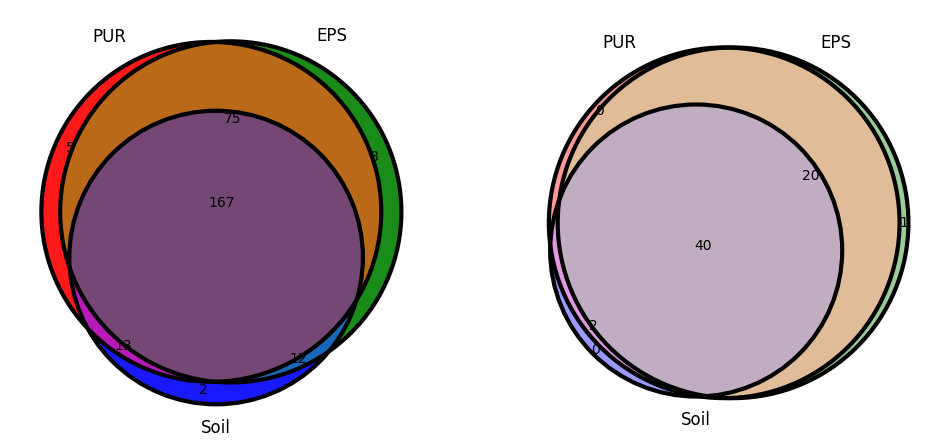

In [27]:
fig =  plt.figure(figsize = (12,12))

ax1 = fig.add_subplot(1, 2, 1)
venn3(subsets=(PUR_ex_a, EPS_ex_a, pur_eps_sh_a, soil_ex_a, pur_soil_sh_a, eps_soil_sh_a, all_sh_a), 
      set_labels = ('PUR', 'EPS', 'Soil'), alpha = 0.9)
venn3_circles(subsets = (PUR_ex_a, EPS_ex_a, pur_eps_sh_a, soil_ex_a, pur_soil_sh_a, eps_soil_sh_a, all_sh_a), 
              alpha=1, linewidth = 3)
ax1 = fig.add_subplot(1, 2, 2)
venn3(subsets=(PUR_ex_m, EPS_ex_m, pur_eps_sh_m, soil_ex_m, pur_soil_sh_m, eps_soil_sh_m, all_sh_m), 
      set_labels = ('PUR', 'EPS', 'Soil'))
venn3_circles(subsets = (PUR_ex_m, EPS_ex_m, pur_eps_sh_m, soil_ex_m, pur_soil_sh_m, eps_soil_sh_m, all_sh_m), 
              alpha=1, linewidth = 3)

plt.show()

SALEN MÁS FEOS QUE PEGAR A UN PADRE CIELO SANTO